# NYC Taxi ride duration prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [ ]:
data_file = "./data/green_tripdata_2021-01.parquet"
df = pd.read_parquet(data_file)
df.info()


In [32]:
miss_values = df.isna().sum()
miss_values = miss_values[miss_values > 0]
miss_columns = miss_values.index

In [36]:
D = {}
for column in miss_columns:
    s= df[column][df[column].isna()].index
    # print(s)
    D[column] = s
D

dict_miss_values = {column : df[column][df[column].isna()].index for column in miss_columns}

In [42]:
dict_miss_values.keys()

dict_keys(['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge'])

column store_and_fwd_flag: 36047 null elements
column RatecodeID: 36047 null elements
column passenger_count: 36047 null elements
column ehail_fee: 76518 null elements
column payment_type: 36047 null elements
column trip_type: 36047 null elements
column congestion_surcharge: 36047 null elements


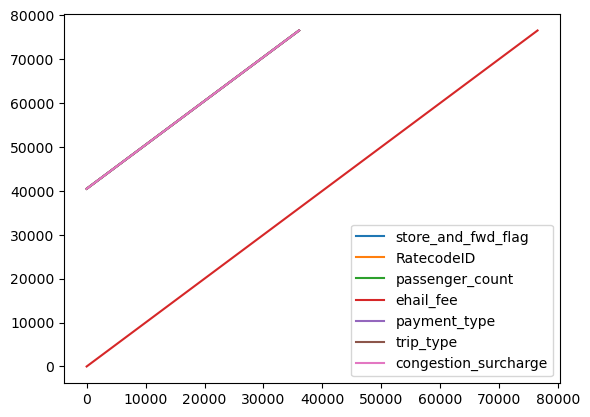

In [54]:
for (column, indexes) in dict_miss_values.items():
    y = indexes.to_list()
    print(f"column {column}: {len(y)} null elements" )
    plt.plot(range(len(y)), y, label = column)
    plt.legend()
    # plt.show()
    

In [57]:
idxs = dict_miss_values["RatecodeID"]
df.loc[idxs]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
40471,2,2021-01-01 00:29:00,2021-01-01 00:34:00,None,NaN,193,193,NaN,1.38,11.95,0.00,0.0,2.75,0.00,None,0.3,15.00,NaN,NaN,NaN
40472,2,2021-01-01 00:52:00,2021-01-01 01:09:00,None,NaN,35,181,NaN,3.65,19.15,0.00,0.0,2.75,0.00,None,0.3,22.20,NaN,NaN,NaN
40473,2,2021-01-01 00:18:00,2021-01-01 00:38:00,None,NaN,174,69,NaN,4.34,23.21,0.00,0.0,2.75,0.00,None,0.3,26.26,NaN,NaN,NaN
40474,2,2021-01-01 00:29:00,2021-01-01 00:47:00,None,NaN,61,256,NaN,4.09,20.93,0.00,0.0,2.75,0.00,None,0.3,23.98,NaN,NaN,NaN
40475,2,2021-01-01 00:54:00,2021-01-01 01:17:00,None,NaN,76,108,NaN,10.47,32.96,0.00,0.0,2.75,0.00,None,0.3,36.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN
